In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split


## Part A: Data Preprocessing and Imputation

### 1. Load and Prepare Data

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### 1.1 Null Values Before replacement :

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### 1.2 Replace 7% of the values in the 'AGE' and 'BILL_AMT' columns with NaN

In [6]:
missing_row_idx  = df[df['AGE'] < 25].index
num_missing_rows = int(len(missing_row_idx) * 0.07)
idxs = missing_row_idx.to_series().sample(num_missing_rows, random_state=42)
df.loc[idxs,'MARRIAGE'] = None


missing_row_idx = df[df['EDUCATION'] < 2].index
num_missing_rows = int(len(missing_row_idx) * 0.07)
idxs = missing_row_idx.to_series().sample(num_missing_rows, random_state=42)
df.loc[idxs, 'PAY_0'] = None


missing_row_idx = df[df['LIMIT_BAL'] < 200000].index
num_missing_rows = int(len(missing_row_idx) * 0.07)
idxs = missing_row_idx.to_series().sample(num_missing_rows, random_state=42)
df.loc[idxs, 'PAY_2'] = None

#### 1.3 Null Values After Replacement

In [7]:
df.isnull().sum()

ID                               0
LIMIT_BAL                        0
SEX                              0
EDUCATION                        0
MARRIAGE                       187
AGE                              0
PAY_0                          741
PAY_2                         1319
PAY_3                            0
PAY_4                            0
PAY_5                            0
PAY_6                            0
BILL_AMT1                        0
BILL_AMT2                        0
BILL_AMT3                        0
BILL_AMT4                        0
BILL_AMT5                        0
BILL_AMT6                        0
PAY_AMT1                         0
PAY_AMT2                         0
PAY_AMT3                         0
PAY_AMT4                         0
PAY_AMT5                         0
PAY_AMT6                         0
default.payment.next.month       0
dtype: int64

#### 1.4 Class Imbalance Checks

In [13]:
cnts  = df['default.payment.next.month'].value_counts()
zeros = cnts[0]
ones  = cnts[1]

imbalance_ratio = min(zeros, ones) / max(zeros, ones)
print(f'Imbalance Ratio: {imbalance_ratio:.4f}')

Imbalance Ratio: 0.2840


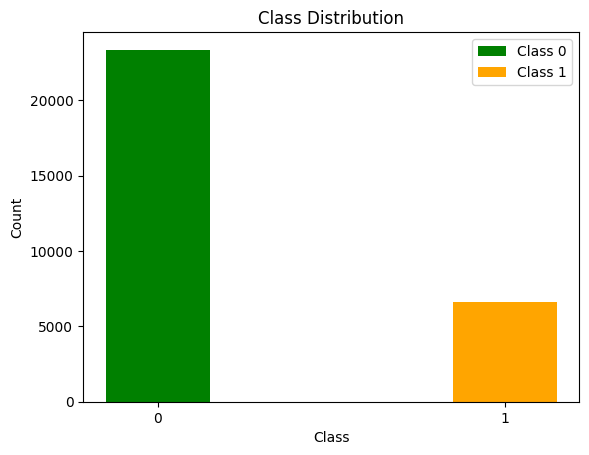

In [23]:
plt.bar(cnts.index.astype(str), cnts.values,width=0.3,color=['green','orange'], label =['Class 0','Class 1'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.legend()
plt.show()

### 2. Imputation Strategy 1

In [7]:
df_clean_1 = df.copy()

In [8]:
mar_median = df_clean_1['MARRIAGE'].median()
pay_0_median = df_clean_1['PAY_0'].median()
pay_2_median = df_clean_1['PAY_2'].median()

df_clean_1.fillna({'MARRIAGE': mar_median, 'PAY_0': pay_0_median, 'PAY_2': pay_2_median}, inplace=True)

#### 2.1 Null Values Check

In [9]:
df_clean_1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

---
#### 2.2 Why the median is often preferred over the mean for imputation

- Lets consider 3 measures of **central tendency** for filling the missing values **(mean,median,mode)**.

**Why Mode is bad Choice ?**

- The problem is data values can be unique.So dataset might have many modes or no clear mode at all, making it an unreliable measure. 

- Now lets we have a single now if we missing values with the same mode we might over-represent that value which can lead to biased distribution

- May be for **categorical data** we can use mode to fill the missing values 

- Hence mode is not suitable for filling **numerical missing values**

**Why Mean is bad Choice?**
- Mean is prone to outliers so it might not represent the data properly while filling with null values.

- Hence mean is not suitable as its senstive to outliers.

**Why Median is Best Choice?**
- Median is middle  most value and less prone to outliers making it a robust measure of central tendency.

- Hence median is often preferred over the mean for imputation.

--- 

#### Assumption For the Imputation Strategies

- For below 2 imputation stragies i am dropping rows in training which contain null values of (marriage and pay_2)

- For test data i am filling it with median.

### 3. Imputation Strategy 2

In [10]:
df_clean_2 = df.copy()

##### Picking `PAY_0` to to predict the missing values based on all other non-missing features

In [11]:


train_data = df_clean_2[df_clean_2['PAY_0'].notnull()]
test_data = df_clean_2[df_clean_2['PAY_0'].isnull()]

train_data = train_data.dropna(subset=['MARRIAGE','PAY_2'])
test_data = test_data.fillna({'MARRIAGE': mar_median, 'PAY_2': pay_2_median})

x_train = train_data.drop(columns=['default.payment.next.month','PAY_0'])
y_train = train_data['PAY_0']

x_test = test_data.drop(columns=['default.payment.next.month','PAY_0'])
y_test = test_data['PAY_0']

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
linear_predictions = linear_model.predict(x_test)
df_clean_2.loc[df_clean_2['PAY_0'].isnull(), 'PAY_0'] = linear_predictions



---
#### 3.1 Underlying assumption of this method

- The main assumption of the linear regression imputation is that there is a **linear relationship** between the column with missing values and the other available features.

- And also it assumes that **missing values are Missing At Random (MAR)**. So that means probability of a value being missing depends on other observed variables in the dataset, but not on the missing value itself.

- So the value missing can be explained by the available features.Assuming the relationship is linear we can use a regression model to predict those missing values.


### 4.​ Imputation Strategy 3 

In [13]:
df_clean_3 = df.copy()

In [14]:

train_data = df_clean_3[df_clean_3['PAY_0'].notnull()]
test_data = df_clean_3[df_clean_3['PAY_0'].isnull()]

train_data = train_data.dropna(subset=['MARRIAGE','PAY_2'])
test_data = test_data.fillna({'MARRIAGE': mar_median, 'PAY_2': pay_2_median})

x_train = train_data.drop(columns=['PAY_0','default.payment.next.month'])
y_train = train_data['PAY_0']

x_test = test_data.drop(columns=['PAY_0','default.payment.next.month'])
y_test = test_data['PAY_0']


model = KNeighborsRegressor() ## taking 5 neighbours which is default
model.fit(x_train, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
knn_predictions = model.predict(x_test)
df_clean_3.loc[df_clean_3['PAY_0'].isnull(), 'PAY_0'] = knn_predictions

## Part B: Model Training and Performance Assessment

### 1.​ Data Split

Here i am am using **stratify = y** while splitting to ensure both train and test have same class distribution

In [16]:
X = df_clean_1.drop(columns=['default.payment.next.month'])
y = df_clean_1['default.payment.next.month']

df1_xtrain,df1_xtest,df1_ytrain,df1_ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [17]:

df_clean_2.dropna(subset=['MARRIAGE','PAY_2'], inplace=True)

X = df_clean_2.drop(columns=['default.payment.next.month'])
y = df_clean_2['default.payment.next.month']

df2_xtrain,df2_xtest,df2_ytrain,df2_ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



In [18]:
df_clean_3.dropna(subset=['MARRIAGE','PAY_2'], inplace=True)

X = df_clean_3.drop(columns=['default.payment.next.month'])
y = df_clean_3['default.payment.next.month']

df3_xtrain,df3_xtest,df3_ytrain,df3_ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)



In [19]:
df_clean_4 = df.copy()
df_clean_4.dropna(inplace=True)

X = df_clean_4.drop(columns=['default.payment.next.month'])
y = df_clean_4['default.payment.next.month']

df4_xtrain,df4_xtest,df4_ytrain,df4_ytest = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


#### Null Values check for df_clean_4

In [20]:
df_clean_4.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

### 2. Classifier Setup

In [21]:

scaler1 = StandardScaler()
df1_xtrain_scaled = scaler1.fit_transform(df1_xtrain)
df1_xtest_scaled = scaler1.transform(df1_xtest)

scaler2 = StandardScaler()

df2_xtrain_scaled = scaler2.fit_transform(df2_xtrain)
df2_xtest_scaled = scaler2.transform(df2_xtest)

scaler3 = StandardScaler()
df3_xtrain_scaled = scaler3.fit_transform(df3_xtrain)
df3_xtest_scaled = scaler3.transform(df3_xtest)

scaler4 = StandardScaler()
df4_xtrain_scaled = scaler4.fit_transform(df4_xtrain)
df4_xtest_scaled = scaler4.transform(df4_xtest)


### 3.​ Model Evaluation

Since the dataset exhibits **class imbalance** (imbalance ratio ≈ 0.28)    `class_weight='balanced'` was applied to give higher importance to the minority class, helping the model handle class imbalance effectively.

In [22]:
model1 = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')
model1.fit(df1_xtrain_scaled,df1_ytrain)
y_pred1 = model1.predict(df1_xtest_scaled)

model1_acc_score = accuracy_score(y_pred=y_pred1,y_true=df1_ytest)
model1_rec_score = recall_score(y_pred=y_pred1,y_true=df1_ytest)
model1_pre_score = precision_score(y_pred=y_pred1,y_true=df1_ytest)
model1_f1_sc = f1_score(y_pred=y_pred1,y_true=df1_ytest)

print(f"Accuracy of model1 is {model1_acc_score}")
print(f"Recall of model1 is {model1_rec_score}")
print(f"Precision of model1 is {model1_pre_score}")
print(f"F1 Score of model1 is {model1_f1_sc}")


Accuracy of model1 is 0.6798333333333333
Recall of model1 is 0.6179351921627732
Precision of model1 is 0.36705461056401073
F1 Score of model1 is 0.4605447907891042


In [23]:

model2 = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')
model2.fit(df2_xtrain_scaled,df2_ytrain)
y_pred2 = model2.predict(df2_xtest_scaled)

model2_acc_score = accuracy_score(y_pred=y_pred2,y_true=df2_ytest)
model2_rec_score = recall_score(y_pred=y_pred2,y_true=df2_ytest)
model2_pre_score = precision_score(y_pred=y_pred2,y_true=df2_ytest)
model2_f1_sc = f1_score(y_pred=y_pred2,y_true=df2_ytest)

print(f"Accuracy of model2 is {model2_acc_score}")
print(f"Recall of model2 is {model2_rec_score}")
print(f"Precision of model2 is {model2_pre_score}")
print(f"F1 Score of model2 is {model2_f1_sc}")


Accuracy of model2 is 0.6939670291125921
Recall of model2 is 0.666131621187801
Precision of model2 is 0.38443723946271424
F1 Score of model2 is 0.48751835535976507


In [24]:
model3 = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')
model3.fit(df3_xtrain_scaled,df3_ytrain)
y_pred3 = model3.predict(df3_xtest_scaled)


model3_acc_score = accuracy_score(y_pred=y_pred3,y_true=df3_ytest)
model3_rec_score = recall_score(y_pred=y_pred3,y_true=df3_ytest)
model3_pre_score = precision_score(y_pred=y_pred3,y_true=df3_ytest)
model3_f1_sc = f1_score(y_pred=y_pred3,y_true=df3_ytest)

print(f"Accuracy of model3 is {model3_acc_score}")
print(f"Recall of model3 is {model3_rec_score}")
print(f"Precision of model3 is {model3_pre_score}")
print(f"F1 Score of model3 is {model3_f1_sc}")

Accuracy of model3 is 0.691687127323746
Recall of model3 is 0.6629213483146067
Precision of model3 is 0.38170055452865065
F1 Score of model3 is 0.4844574780058651


In [25]:
model4 = LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')
model4.fit(df4_xtrain_scaled,df4_ytrain)
y_pred4 = model4.predict(df4_xtest_scaled)

model4_acc_score = accuracy_score(y_pred=y_pred4,y_true=df4_ytest)
model4_rec_score = recall_score(y_pred=y_pred4,y_true=df4_ytest)
model4_pre_score = precision_score(y_pred=y_pred4,y_true=df4_ytest)
model4_f1_sc = f1_score(y_pred=y_pred4,y_true=df4_ytest)

print(f"Accuracy of model4 is {model4_acc_score}")
print(f"Recall of model4 is {model4_rec_score}")
print(f"Precision of model4 is {model4_pre_score}")
print(f"F1 Score of model4 is {model4_f1_sc}")
                        


Accuracy of model4 is 0.6993522849946023
Recall of model4 is 0.6469622331691297
Precision of model4 is 0.38836865450961067
F1 Score of model4 is 0.4853711117955035


## Part C: Comparative Analysis


### 1. Results Comparison

In [26]:
results = {
    'Accuracy': [model1_acc_score, model2_acc_score, model3_acc_score, model4_acc_score],
    'Recall': [model1_rec_score, model2_rec_score, model3_rec_score, model4_rec_score],
    'Precision': [model1_pre_score, model2_pre_score, model3_pre_score, model4_pre_score],
    'F1 Score': [model1_f1_sc, model2_f1_sc, model3_f1_sc, model4_f1_sc]
}

results_df = pd.DataFrame(results, index=['Model 1', 'Model 2', 'Model 3', 'Model 4'])
results_df = results_df.apply(lambda x: x.round(3))

results_df

,Accuracy,Recall,Precision,F1 Score
Model 1,0.680,0.618,0.367,0.461
Model 2,0.694,0.666,0.384,0.488
Model 3,0.692,0.663,0.382,0.484
Model 4,0.699,0.647,0.388,0.485


### 2.​ Efficacy Discussion


#### Imputation Strategies Vs ListWise Deletion

From the above results we can see the **imputation strategies** performs slightly better normal **listwise deletion**. This is because :

- In list wise deletion we are **deleting rows** which contains null values which lwads to a smaller dataset and.A smaller dataset provides less information for the model to learn so model doesnt generalize to new unseen data

- In our data we are reomving values of potentially **young customers** in dataset D so a model trained on this data performs well on older customers but performs poorly when it encounters younger customers as it hasnt seen any data on them which means we potentially making a biased model 

- But imputation stratgies instead of removing the values they tried to retained the original data distribution by filling in missing values and model trained on this data will generally outperform he model that was trained on a smaller, biased dataset.

- Hence **Model D** performs poorly when compared to A,B,C


#### Linear vs Non Linear Imputation 

- By observing the results ,Linear Regression Imputation (Model 2) performed the best.It slightly outperformed **Non-Linear Regression Imputation (Model 3)**.

- This suggest that relationship between **PAY_0** a(imputed feature) and other predictors is primarly **linear** which linear regression model is able capture effectively.

- On other hand **KNN** a non linear model may be couldnt able to find any significant non-linear patterns and its added complexity may have introduced noise leading to a slightly lower score.


#### Best Strategy For Handling Missing Data

- In this scenario **Linear Regression Imputation (Model 2)** is recommended as the best strategy.

- Althought it has low accuracy compared to **Model 4** Its high **Recall** and **F1 score** which helps to detect positive cases more effectively which is more important in this case.

- Linear imputation preserves data distribution while capturing the main linear relationships between features, avoiding the bias introduced by listwise deletion or the noise sometimes added by non-linear methods. 

- Hence Linear Regression Imputation is best for this dataset.